# 使用FlashTorch套件，观察梯度对辨识的帮助

## 载入相关套件

In [11]:
!pip install flashtorch -U


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import matplotlib.pyplot as plt
import torch
import torchvision.models as models

from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop

## 载入图档

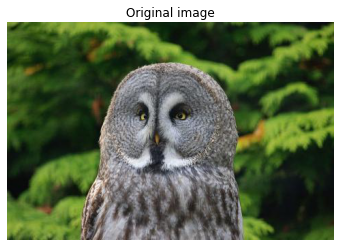

In [13]:
image = load_image('./images_test/owl.jpg')

plt.imshow(image)
plt.title('Original image')
plt.axis('off');

## 载入预先训练的模型 AlexNet

In [14]:
model = models.alexnet(pretrained=True)

## 建立反向传导的物件

In [15]:
backprop = Backprop(model)

## 观察显著地图(Saliency map)

C:\anaconda3\lib\site-packages\torch\nn\modules\module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


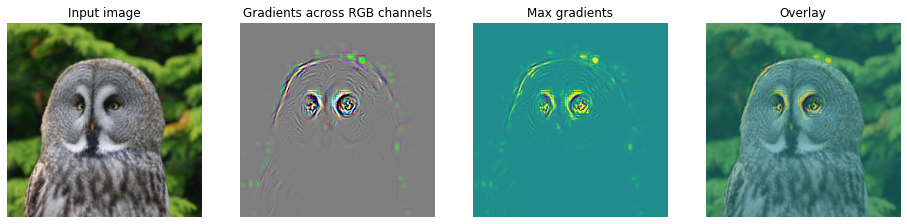

In [16]:
# 将图像转换为张量
owl = apply_transforms(image)

# 猫头鹰(Owl)在 ImageNet 的类别代码为 24
target_class = 24

# 视觉化
backprop.visualize(owl, target_class, guided=True)

## 其他图像

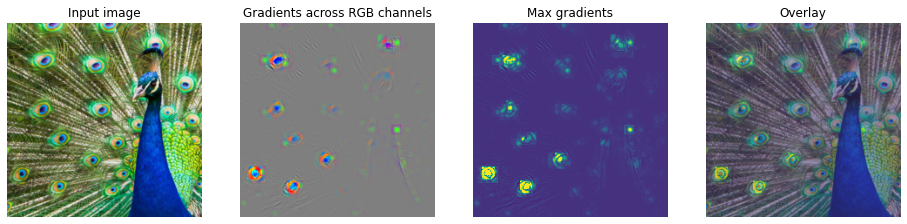

In [17]:
peacock = apply_transforms(load_image('./images_test/peacock.jpg'))
backprop.visualize(peacock, 84, guided=True)

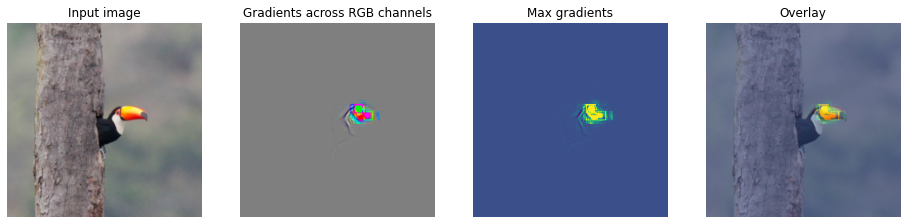

In [18]:
toucan = apply_transforms(load_image('./images_test/toucan.jpg'))
backprop.visualize(toucan, 96, guided=True)